In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
import seaborn as sns
import matplotlib as mpl
import itertools
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, learning_curve, ShuffleSplit

%matplotlib inline

In [8]:
df = pd.read_csv('C:/Users/Вова/Desktop/All-seasons.csv')

In [9]:
df.head()

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away. \n"
1,10,1,Kyle,Going away? For how long?\n
2,10,1,Stan,Forever.\n
3,10,1,Chef,I'm sorry boys.\n
4,10,1,Stan,"Chef said he's been bored, so he joining a gro..."


In [10]:
df.describe()

,Season,Episode,Character,Line
count,70896,70896,70896,70896
unique,19,19,3950,64301
top,2,10,Cartman,What?\n
freq,6416,5271,9774,361


In [18]:
table = pd.pivot_table(df,index=["Character"],values=["Line"],aggfunc="count")
table.sort_values(by=['Line'], ascending=False)

,Line
Character,
Cartman,9774
Stan,7680
Kyle,7099
Butters,2602
Randy,2467
Mr. Garrison,1002
Chef,917
Kenny,881
Sharon,862


In [ ]:
#После анализа выборки мы видим, что героев очень много и брать героев, которые сказали всего одну фразу нерелевантно. 
#Также для более сбалансированной выборки можно взять только первых трех героев, у которых больше всего реплик.

In [23]:
df2 = df.loc[(df['Character'] == 'Cartman') | (df['Character'] == 'Stan') | (df['Character'] == 'Kyle') ].sample(frac=1).reset_index(drop=True)
df2.head()

,Season,Episode,Character,Line
0,15,2,Stan,"Yeah, look uh, I don't think I can make it, Ji..."
1,6,12,Cartman,I found this car seat in Mr. Garrison's car. \n
2,2,13,Cartman,Ay! Check it out! Damn it!\n
3,1,6,Stan,"Okay grampa, okay, just get out of the way of ..."
4,14,2,Stan,"Aw dude, this is even lamer than we thought. \n"


In [24]:
table2 = pd.pivot_table(df2,index=["Character"],values=["Line"],aggfunc="count")
table2.sort_values(by=['Line'], ascending=False)

,Line
Character,
Cartman,9774
Stan,7680
Kyle,7099


In [25]:
df2.describe()

,Season,Episode,Character,Line
count,24553,24553,24553,24553
unique,18,18,3,22354
top,2,1,Cartman,What?\n
freq,2332,1939,9774,186


In [28]:
def tokenize(text):
    text = text.lower()
    return word_tokenize(text)

In [35]:
bow = CountVectorizer(tokenizer=tokenize, stop_words='english')
bowed = bow.fit_transform(df2['Line'])
X_train, X_test, y_train, y_test = train_test_split(bowed, df2['Character'], test_size=0.2)

In [36]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19642, 12688) (4911, 12688) (19642,) (4911,)


In [38]:
rfc = RandomForestClassifier(n_estimators=80)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

    Cartman       0.59      0.62      0.60      1999
       Kyle       0.43      0.37      0.40      1425
       Stan       0.43      0.45      0.44      1487

avg / total       0.49      0.50      0.49      4911



In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1236  333  430]
 [ 416  530  479]
 [ 438  374  675]]


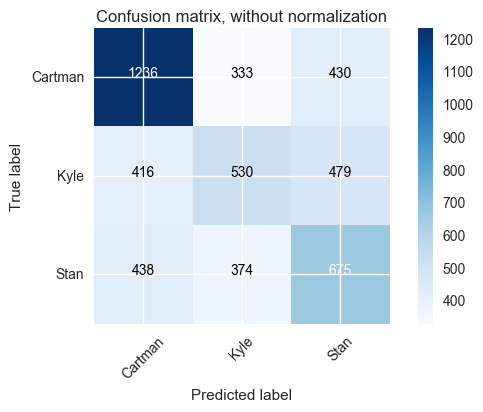

In [40]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=rfc.classes_,
                      title='Confusion matrix, without normalization')
plt.show()

Normalized confusion matrix
[[ 0.61830915  0.16658329  0.21510755]
 [ 0.29192982  0.37192982  0.33614035]
 [ 0.29455279  0.25151311  0.4539341 ]]


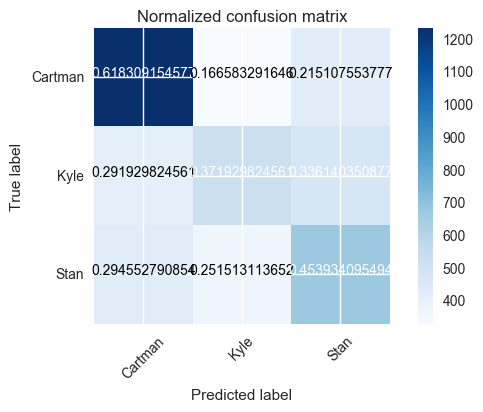

In [42]:
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=rfc.classes_, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [ ]:
#По матрице видно, что лучше всего распазноются реплик Картмана, хуже всего - Кайла

In [43]:
naive_model = MultinomialNB()
naive_model.fit(X_train, y_train)
y_pred2 = naive_model.predict(X_test)
print(classification_report(y_test, y_pred2))

             precision    recall  f1-score   support

    Cartman       0.55      0.69      0.61      1999
       Kyle       0.46      0.31      0.37      1425
       Stan       0.45      0.43      0.44      1487

avg / total       0.49      0.50      0.49      4911



Confusion matrix, without normalization
[[1385  254  360]
 [ 563  437  425]
 [ 592  261  634]]


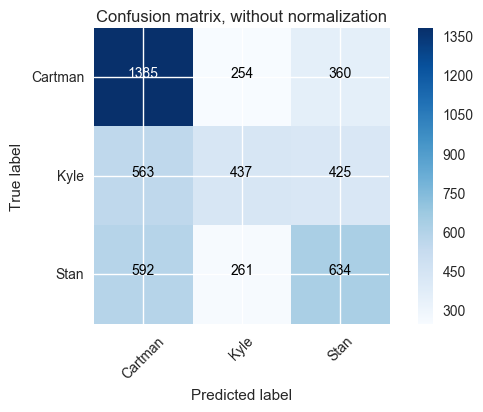

Normalized confusion matrix
[[ 0.69284642  0.12706353  0.18009005]
 [ 0.39508772  0.30666667  0.29824561]
 [ 0.39811701  0.17552118  0.4263618 ]]


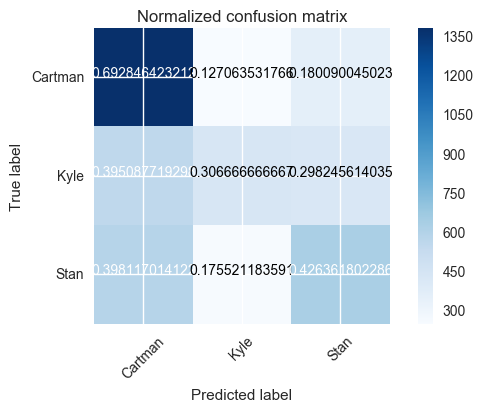

In [45]:
cnf_matrix2 = confusion_matrix(y_test, y_pred2)
plt.figure()
plot_confusion_matrix(cnf_matrix2, classes=naive_model.classes_,
                      title='Confusion matrix, without normalization')
plt.show()
plt.figure()
plot_confusion_matrix(cnf_matrix2, classes=naive_model.classes_, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [46]:
#При наивном баисе результаты чуть лучше, но общая картина такая же: Картман распознается лучше всего

In [48]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
y_pred3 = lr.predict(X_test)
print(classification_report(y_test, y_pred3))

             precision    recall  f1-score   support

    Cartman       0.65      0.61      0.63      1999
       Kyle       0.43      0.46      0.45      1425
       Stan       0.46      0.47      0.46      1487

avg / total       0.53      0.52      0.53      4911



Confusion matrix, without normalization
[[1218  405  376]
 [ 322  655  448]
 [ 340  447  700]]


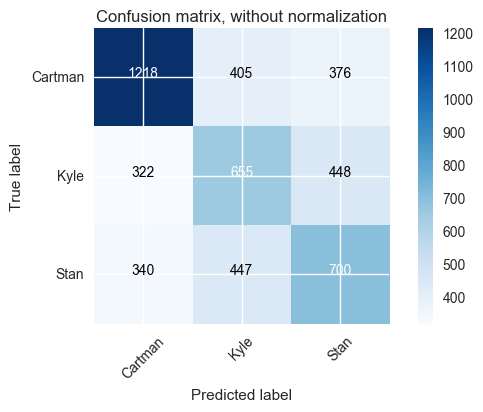

Normalized confusion matrix
[[ 0.60930465  0.2026013   0.18809405]
 [ 0.22596491  0.45964912  0.31438596]
 [ 0.22864829  0.30060525  0.47074647]]


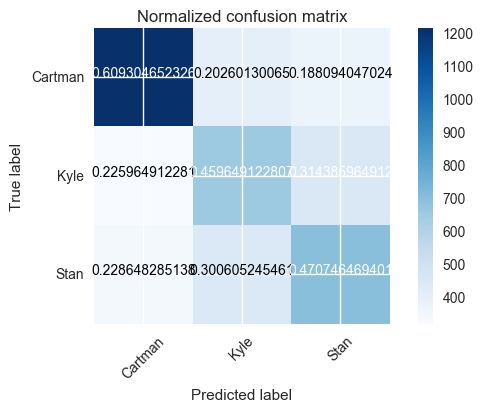

In [49]:
cnf_matrix3 = confusion_matrix(y_test, y_pred3)
plt.figure()
plot_confusion_matrix(cnf_matrix3, classes=lr.classes_,
                      title='Confusion matrix, without normalization')
plt.show()
plt.figure()
plot_confusion_matrix(cnf_matrix3, classes=lr.classes_, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [ ]:
#при логистической регрессии Кайл и Стэн стали распознаваться лучше, Картман чуть хуже, но он попрежнему распознается 
#лучше всего. Это может объясняться тем, что ему пренадлежит больше всего высказываний

In [50]:
#Сравнение с Baseline классификатором
baseline = DummyClassifier(strategy = 'stratified')
baseline.fit(X_train, y_train)
y_pred4 = baseline.predict(X_test)
print(classification_report(y_test, y_pred4))

             precision    recall  f1-score   support

    Cartman       0.43      0.43      0.43      1999
       Kyle       0.29      0.28      0.29      1425
       Stan       0.30      0.31      0.31      1487

avg / total       0.35      0.35      0.35      4911



Confusion matrix, without normalization
[[860 544 595]
 [563 406 456]
 [589 439 459]]


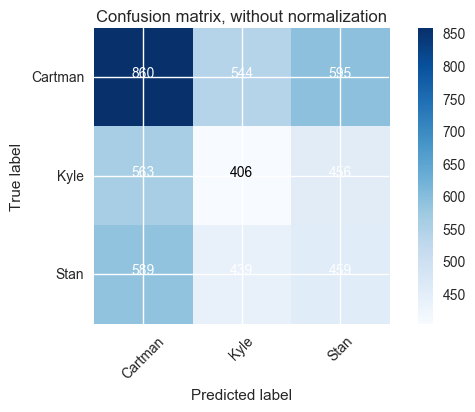

Normalized confusion matrix
[[ 0.43021511  0.27213607  0.29764882]
 [ 0.39508772  0.28491228  0.32      ]
 [ 0.39609953  0.29522529  0.30867518]]


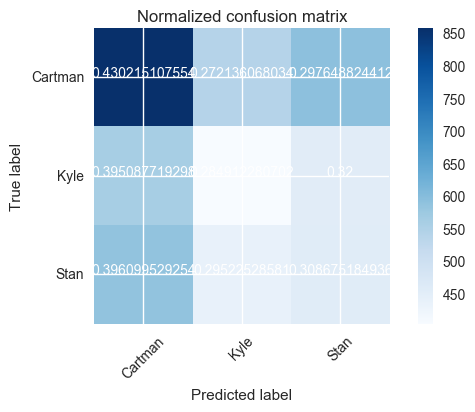

In [51]:
cnf_matrix4 = confusion_matrix(y_test, y_pred4)
plt.figure()
plot_confusion_matrix(cnf_matrix4, classes=baseline.classes_,
                      title='Confusion matrix, without normalization')
plt.show()
plt.figure()
plot_confusion_matrix(cnf_matrix4, classes=baseline.classes_, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [ ]:
#Baseline классификатор работает хуже всего. Ф-мера совсем маленькая, а это очень плохо. В итоге, лучще всего сработала
#лог. регрессия, хотя ее результаты тоже оставляют желать лучшего. 